![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Quality assessment of ice sheet velocity data from satellite observations: temporal and spatial resolution/coverage and data completeness for trend analysis in glaciological applications

- Data stream: satellite (observations)
- Quality area: resolution, temporal/spatial coverage, data completeness, trend assessment
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Monitoring Greenland ice sheet surface ice flow velocity patterns for glaciological purposes, such as solid ice discharge modeling

## ❓ Quality assessment question
* **"Is the dataset of sufficient spatial/temporal resolution, coverage and completeness to derive multi-year trends of horizontal surface flow velocities and the associated patterns of solid ice discharge?"**

The ice of ice sheets is not static, but instead flows. The primary cause of this dynamical process is the internal deformation of ice in response to gravity. As a consequence, stresses cause the ice to flow downslope under its own weight. The total velocity magnitude is the sum of the velocity related to internal ice deformation, and is complemented by basal sliding and bed deformation components. Mapping the Greenland Ice Sheet (GrIS) surface flow velocity and its temporal changes provides key information for investigating the dynamic response of the ice sheet to climate change. Remote sensing techniques, such as the use of satellites, are an important feature to derive and study these surface flow velocities of the ice sheets. These devices are able to inspect directly and repeatedly large areas of ice, and, as such are able to detect the movement of its surface. Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate surface velocities of the ice sheets on a regular basis. To derive the surface flow velocities of the data that are on the Climate Data Store (CDS), Synthetic Aperture Radar (SAR) offset tracking methods have been used. The main principle relies on the preservation of surface features or other detectable patterns in between multiple image acquisition periods. The extraction of these features/patterns from images acquired over different time periods (i.e. image pairs) is used to detect their displacements, and with further processing this information can be used to derive velocity fields (Nagler et al., 2015). The velocity data can, for example, be used to calculate solid ice discharge, i.e. the ice flux across the grounding line, which is an important component of the mass balance of the grounded ice sheet. The used data acquisition techniques, however, also have their limitations (e.g. Paul et al., 2017; Lüttig et al., 2017), of which the user should take note before using the product. This notebook investigates how well the dataset on the CDS (here we use version 1.3 and 1.4) can be used to derive mean values, (inter/intra-)annual variability and multi-year trends of ice flow velocities and associated patterns of solid ice discharge. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its spatio-temporal coverage and resolution. 

## 📢 Quality assessment statement

- Ice velocity (“displacement”) detection by satellites is a useful tool to grasp the overall patterns of flow dynamics of the ice sheets. When using the flow velocity data for the Greenland Ice Sheet (GrIS), users should, however, be aware of the typical strengths and limitations for SAR-based remote sensing-derived velocity products.
- The dataset can be considered highly mature and complete in terms of its spatial resolution and coverage, as these agree with thresholds proposed by the GCOS (2022). The short temporal extent of the data (since 2017-2018), however, puts a limit on extended use of the data. The GrIS velocity products are at this stage therefore not found to be suitable to derive reliable statistical properties such as means, inter/intra-annual variability and trends (and hence to deduce climate change signals), as the number of consecutive years is not sufficient (< 30 years) to filter out variability and derive reliable trends. To mitigate these limitations, users can integrate additional external datasets with longer time spans, which can further enhance the data robustness if desired. Spatial coverage is excellent and encompasses the entire continent, but an ice mask to get rid of abundant non ice-covered grid cells is not provided, whereas the inclusion of these pixels (which include noise) may affect the calculated trend. Derived multi-year trends of ice flow velocities should therefore be handled with care. 
- Other potential limitations and sources of error to take into account for the specific use case and use questions and/or other similar climatological, hydrological or glaciological applications are the fact that there is no information given related to the time of the year during which valid measurements were acquired, and that spatially filled up pixels are not flagged or detectable. Areas that typically pose challenges for SAR-derived velocity estimates include the ice sheet margins (which are important for the derivation of solid ice discharges) and interior low-velocity zones. In these regions, there are generally fewer valid measurements and/or higher standard deviations (precision errors), indicating lower data quality. 
- In the context of the specific use case and question, is must be said that, although the dataset on the Climate Data Store (CDS) provides surface velocities, the vertically averaged horizontal velocity and not the surface velocity is required to calculate solid ice discharge. However, because basal sliding is generally the dominant process that defines the ice velocity at the grounding line, surface velocities generally do not differ significantly from vertically averaged horizontal velocities (e.g. Mankoff et al., 2020). The dataset's annually averaged temporal resolution is also sufficient for solid ice discharge calculations, as seasonal variations are generally not significant (e.g. van den Broeke et al., 2009). The dataset is thus of sufficient spatial coverage and spatial/temporal resolution, but not of sufficient temporal coverage to derive multi-year trends of horizontal surface flow velocities and the associated patterns of solid ice discharge.
- Around the ice sheet margins, where solid ice discharge processes occur, users should furthermore take into account lower data quality (i.e. higher standard deviations) and difficulties in distinguishing ice-free and ice-covered areas due to the lack of an ice mask. To distinguish between ice-free and ice-covered pixels, users could carefully select a threshold velocity to accurately separate ice-covered areas from bare ground, or apply a custom ice mask from external data which helps to exclude non-ice-covered cells. Furthermore, to precisely quantify the solid ice discharge, also other additional and external datasets of other variables that are not on the CDS are needed, of which the most important ones are the position of the grounding line and the ice thickness at those locations (e.g. Mankoff et al., 2020). 

## 📋 Methodology

### Short description

The 'Greenland Ice Sheet (GrIS) annual gridded velocity data from 2017 to present derived from satellite observations' dataset, available on the Climate Data Store (CDS), offers annually averaged ice flow velocities and their easting and northing components for the GrIS. This data is provided on a spatial resolution grid of either 250 m or 500 m, depending on the dataset version. The dataset includes horizontal velocity components in the east and north directions, as well as the total horizontal velocity magnitude and its error, all presented on a regular grid. Surface flow velocities are treated as “displacements,” normalized to true meters per day, and are available for each glaciological year since 2017-2018. The horizontal velocities and their components are derived using offset tracking techniques with Sentinel-1 synthetic aperture radar (SAR) satellite data. The vertical velocity component that is present in the dataset is calculated indirectly from the difference in surface elevation between the start and end positions of the displacement vector, derived from a Digital Elevation Model (DEM). Hence, it does not represent the net upward or downward movement of the ice at that pixel. The data are provided in NetCDF format as gridded data fields in Polar Stereographic projection, covering the entire GrIS domain, including peripheral glaciers and ice caps. Version 1.4 includes a dynamic ice/ocean masking for outlet glaciers based on updated calving fronts, while earlier versions (version 1.3 and lower) exhibited a fixed ice-ocean mask.

### Structure and (sub)sections

In this notebook, the applicability of the Greenland Ice Sheet (GrIS) surface ice flow velocity data to derive reliable values for the means, inter/intra-annual variability and trends will be assessed. We will therefore check whether the velocity data are of sufficient adequacy in terms of its spatial/temporal resolution, coverage and completeness for this purpose. This will be realized by analyzing the spatial and temporal characteristics of the velocity data, by quantifying the linear trends in the data, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. deriving reliable means, variability and trends of ice sheet flow velocities and the associated solid ice discharge for Greenland). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Spatial and temporal patterns of ice sheet surface ice flow velocities**: in this section, we plot, analyze, and interpret the spatial patterns of horizontal surface ice flow velocities and their corresponding directions. We will check the consistency of these patterns across different time periods and compare them to expected results from the literature. This involves examining how ice flow varies spatially across the ice sheet and temporally over the study periods.
- **Analysis of spatio-temporal resolution and extent of ice sheet velocities**: this section delves into the temporal and geographical resolution and coverage (i.e. data completeness) of the Greenland Ice Sheet (GrIS) velocity product. We discuss the length of the available time series (i.e. the temporal extent) and quantify the number of pixels with a continuous, gap-free data series over time.
- **Trends of annually averaged horizontal surface ice flow velocities**: here, we calculate, plot, and discuss the linear trend of the ice sheet-wide averaged horizontal surface flow velocity time series. We analyze the overall trends observed in the data and compare these trends to expected changes due to a warming climate.
- **Implications for deriving multi-year trends and the intra/interannual variability of surface flow velocities and associated patterns of ice discharge**: the final section uses all information derived above to assess the suitability of the ice sheet surface ice flow velocity dataset (with respect to the spatial/temporal resolution, coverage and completeness) to derive reliable values for the means, variability and trends of the ice sheet surface flow velocities and the associated patterns of solid ice discharge. This assessment provides recommendations on how to effectively interpret calculated trends of ice flow velocities and solid ice discharge patterns based on a clear understanding of the dataset’s strengths and limitations in terms of the spatial/temporal resolution, coverage and completeness.

## 📈 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [80]:
import matplotlib.colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import math
from c3s_eqc_automatic_quality_control import download
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")

plt.style.use("seaborn-v0_8-notebook")

Then we define requests for download from the CDS and download the GrIS velocity data.

🚨 **The files can be large! Since the data files to be downloaded have a considerable size due to the high spatial resolution, this may take a couple of minutes.**

In [81]:
period_start = "2017_2018"
period_stop = "2020_2021"
assert all("_" in period and len(period) == 9 for period in (period_start, period_stop))

y0_start, y1_start = map(int, period_start.split("_"))
y0_stop, y1_stop = map(int, period_stop.split("_"))
collection_id = "satellite-greenland-ice-sheet-velocity"
request = {
    "variable": "all",
    "format": "zip",
    "version": ["1.3","1.4"],
    "period": [
        f"{y0}_{y1}"
        for y0, y1 in zip(range(y0_start, y0_stop + 1), range(y1_start, y1_stop + 1))
    ],
}

print("Downloading ice sheet velocity data, this may take a couple of minutes...")

ds = download.download_and_transform(
    collection_id,
    request,
)

# Get the chunk sizes
chunk_sizes = {}
for var_name, da in ds.data_vars.items():
    if var_name == "crs":
        continue  # Skip the variable named "crs"
    chunks = []
    if da.chunks is not None:  # Check if da.chunks is not None
        for dim_chunks in da.chunks:
            if isinstance(dim_chunks, tuple):
                dim_chunks = tuple(filter(lambda x: isinstance(x, int), dim_chunks))
                chunks.append(dim_chunks)
    chunk_sizes[var_name] = tuple(chunks)
extracted_sizes = set()
for var_name, sizes in chunk_sizes.items():
    for size_tuple in sizes:
        extracted_sizes.update(size_tuple)
ds = ds.chunk(y=list(extracted_sizes)[3], x=list(extracted_sizes)[2])

print("Downloading completed.")

100%|██████████| 1/1 [00:30<00:00, 30.55s/it]


We can read and inspect the data. Let us print out the data to inspect its structure:

In [82]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:                              (source: 4, y: 10801, x: 5984)
Coordinates:
  * source                               (source) object 32B 'C3S_GrIS_IV_250...
  * y                                    (y) float64 86kB -6.556e+05 ... -3.3...
  * x                                    (x) float64 48kB -6.399e+05 ... 8.55...
Data variables:
    crs                                  (source) int32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    land_ice_surface_easting_velocity    (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_northing_velocity   (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_vertical_velocity   (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_velocity_magnitude  (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_measurement_count   (source, y, x) float64 2GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_easting_stddev      (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_northing_stddev     (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
Attributes: (12/13)
    comment:        Ice velocity map of Greenland derived from Sentinel-1 SAR...
    contact:        www.c3s.com
    Conventions:    CF-1.7
    creation_date:  2021-01-27
    history:        Initial product version 1.3
    institution:    Copernicus Climate Change Service
    ...             ...
    license:        C3S general license
    project:        C3S_312b_Lot4_ice_sheets_and_shelves
    reference:      Main: Nagler, T.; Rott, H.; Hetzenecker, M.; Wuite, J.; P...
    source:         Copernicus Sentinel-1A and Sentinel-1B
    summary:        Ice velocity derived for Greenland Ice Sheet gridded at 2...
    title:          Ice Velocity of the Greenland Ice Sheet

The versions 1.3 and 1.4 are a gridded dataset at a 250 m spatial resolution containing annually averaged values of the ice sheet horizontal surface flow velocity $V$ (in m/day) of a grid cell (`land_ice_surface_velocity_magnitude`) and its components (`land_ice_surface_easting_velocity` ($V_x$) and `land_ice_surface_northing_velocity` ($V_y$)) since the 2017-2018 hydrological year. The uncertainties (reported as precision errors or standard deviations) of the horizontal components are also given as `land_ice_surface_easting_stddev` ($\sigma_{V_x}$) and `land_ice_surface_northing_stddev` ($\sigma_{V_y}$). Also the vertical component is given as `land_ice_surface_vertical_velocity` ($V_z$), but without a corresponding uncertainty. Next to that, also a variable named `land_ice_surface_measurement_count` is present, which quantifies the total number of valid image pairs used in the annually averaged velocity estimate for a certain pixel. 

For clarification, the total horizontal velocity magnitude $V$ and its uncertainty $\sigma_{V}$ are calculated from its components as follows:

$
V
$
[m day⁻¹] 
$
= \sqrt {V_x^2 + V_y^2}
$

$
\sigma_{V}
$
[m day⁻¹] 
$
= \sqrt {(\sigma_{V_x})^2 + (\sigma_{V_y})^2}
$

where $V_x$ and $V_y$ are respectively the easting and northing components of the horizontal velocity vector. 

The flow direction of the ice can be calculated as follows:

$
\theta_{\text{V}} = \left( 90^\circ - \left( \arctan2(v_y, v_x) \times \left( \frac{180}{\pi} \right) \right) \right) \mod 360^\circ
$

Let us calculate and add the total standard deviation to the data, as well as the flow direction of the ice, so we can work with it easily later on in the notebook. We also perform some data slight manipulations to the data array to improve data handling:

In [83]:
def compute_std_flowdirection_and_reform(ds):
    name = "land_ice_surface_velocity_magnitude"
    ds = ds.chunk(y=list(extracted_sizes)[3], x=list(extracted_sizes)[2])

    # Add std
    std = (
        ds["land_ice_surface_easting_stddev"] ** 2
        + ds["land_ice_surface_northing_stddev"] ** 2
    ) ** (1 / 2)
    std.attrs = {
        "long_name": "Velocity standard deviation",
        "units": ds[name].attrs["units"],
    }
    ds["land_ice_surface_stddev"] = std

    # Flow direction
    angle_radians = np.arctan2(ds["land_ice_surface_northing_velocity"], ds["land_ice_surface_easting_velocity"])
    angle_degrees = np.degrees(angle_radians)
    flow_direction = (90 - angle_degrees) % 360
    ds['land_ice_flow_direction'] = flow_direction

    # Preserve chunksizes
    ds = ds[
        [
            "land_ice_surface_velocity_magnitude",
            "land_ice_surface_measurement_count",
            "land_ice_surface_stddev",
            "land_ice_flow_direction"
        ]
    ]
    for da in ds.data_vars.values():
        da.encoding["chunksizes"] = tuple(map(max, da.chunks))
    return ds

ds = compute_std_flowdirection_and_reform(ds)

# Rename source dim
periods = []
for source in ds["source"].values.tolist():
    start, stop = source.split("_")[5:7]
    periods.append(f"{start[:4]}-{stop[:4]}")
ds["source"] = periods
ds = ds.rename(source="period")

# Add attributes
for name, da in ds.data_vars.items():
    if name == "land_ice_surface_measurement_count":
        da.attrs["units"] = "image pairs"
        da.attrs["long_name"] = "Count of valid measurements"
    if name == "land_ice_flow_direction":
        da.attrs["units"] = "degrees"
        da.attrs["long_name"] = "Flow direction"
    if "long_name" not in da.attrs:
        da.attrs["long_name"] = da.attrs.get("description", name.replace("_", " "))

Now, our dataset array only holds the most important information: the total horizontal velocity magnitude (`land_ice_surface_velocity_magnitude`), the valid pixel count (`land_ice_surface_measurement_count`), the calculated ice flow direction (`land_ice_flow_direction`), and our calculated standard deviation (`land_ice_surface_stddev`) from the northing and easting components. Let us begin with the analysis.

### 📉 Spatial and temporal patterns of ice sheet surface ice flow velocities

We begin by plotting the ice flow velocities for each hydrological year between the beginning and end period that we selected for the velocity data with a defined plotting function.

🚨 **The files can be large! Since the data files to be plotted have a considerable size, this may take a couple of minutes.**

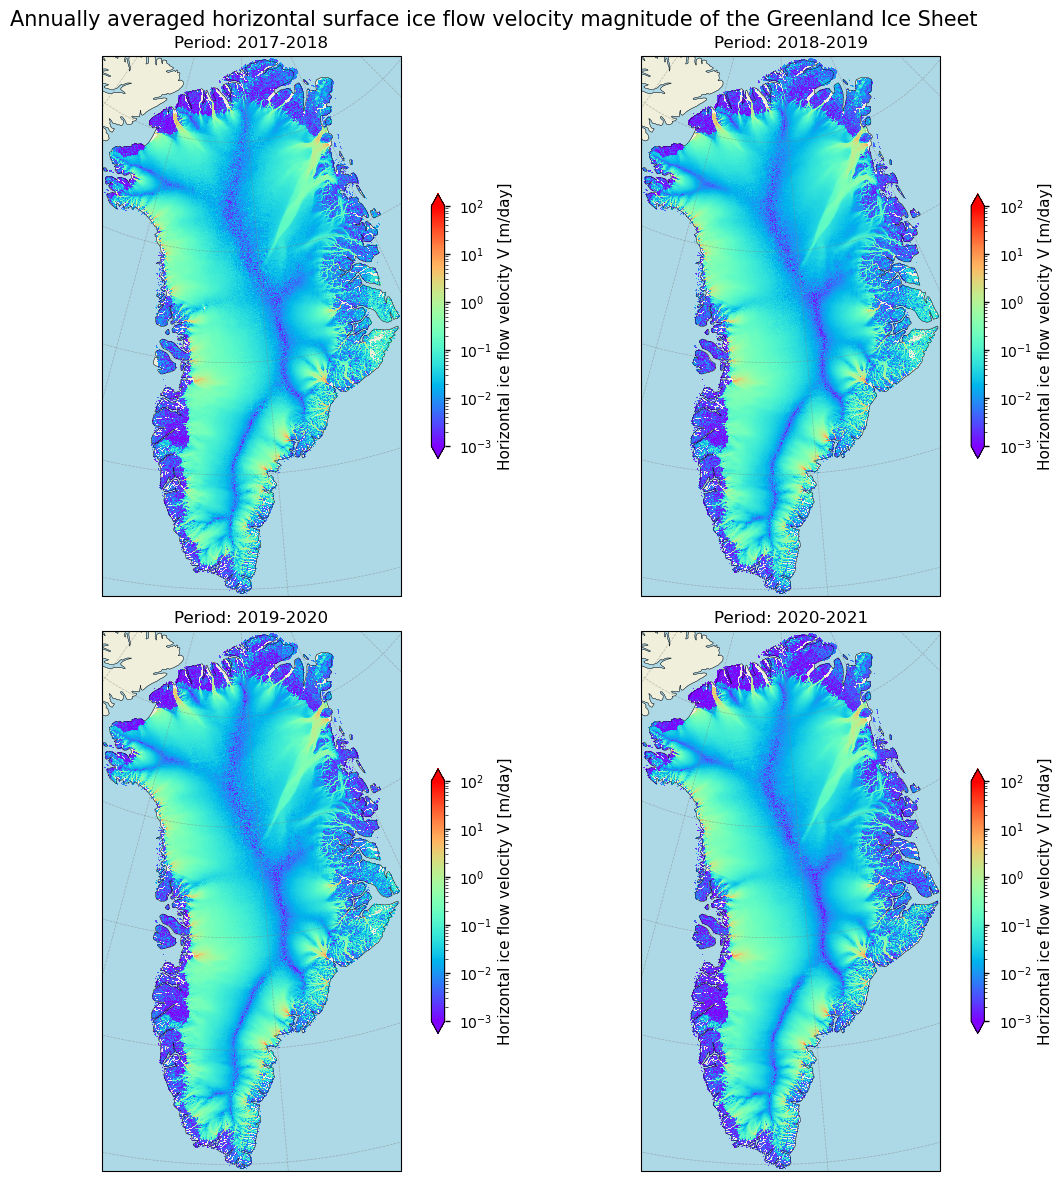

In [44]:
def plot_maps(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "rainbow")

    # Plot each period on a different subplot
    if 'period' in da.coords:
        periods = da.coords['period'].values
        num_periods = len(periods)
        num_cols = 2
        num_rows = math.ceil(num_periods / num_cols)
    else:
        periods = 1
        num_periods = 1
        num_cols = 1
        num_rows = 1

    # Create subplots with Polar Stereographic projection
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)}) # Check in metadata for info of projection
    axs = axs.flatten()  # Flatten the array of axes for easy iteration
    if suptitle:
        fig.suptitle(suptitle,fontsize=15)

    for i, (ax, period) in enumerate(zip(axs, periods)):
        if period is not None:
            subset_da = da.sel(period=period)
        else:
            subset_da = da
    
        # Plot the data 
        im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
        # Set extent and plot features
        ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.OCEAN, color='lightblue')
        ax.coastlines()
        ax.gridlines(draw_labels=False,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
        ax.set_title(f'Period: {period}' if period is not None else 'Full Data')
        fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    fig.tight_layout()  
    plt.show()

# Apply the function to the velocity data
da = ds["land_ice_surface_velocity_magnitude"]
da.attrs = {
    "long_name": "Horizontal ice flow velocity V",
    "units": "m/day",
}
_ = plot_maps(
    da,
    norm=matplotlib.colors.LogNorm(),
    vmin=1e-3,
    vmax=1e2,
    suptitle="Annually averaged horizontal surface ice flow velocity magnitude of the Greenland Ice Sheet",
)

The corresponding data are annually averaged values, derived from all year-round observations during the glaciological balance year of the GrIS (1 October to 30 September). The horizontal velocity data effectively highlight the low-flow zones in the interior and the increased velocities near the ice sheet’s margins and outlet glaciers. This pattern aligns with findings from other GrIS velocity maps in the literature, such as those by Howat et al. (2022). The annually averaged nature meets the minimum requirement set by the Global Climate Observing System (GCOS, 2022), providing a comprehensive overview of ice flow velocities. However, there is no information given related to the time of the year during which valid pixels for the velocity calculation were acquired. The ultimate goal would be to have ice flow velocities at a monthly time scale. The spatial resolution of 250 m meets the threshold value proposed by GCOS (2022), but the ultimate goal would be an even finer grid spacing of 50 m. In other words, both the spatial and temporal resolution meet the minimum requirement to ensure that data are useful for use in climatological, hydrological and glaciological studies and applications.

We can also plot flow directions (i.e. the direction to which the ice flows measured clockwise from the north):

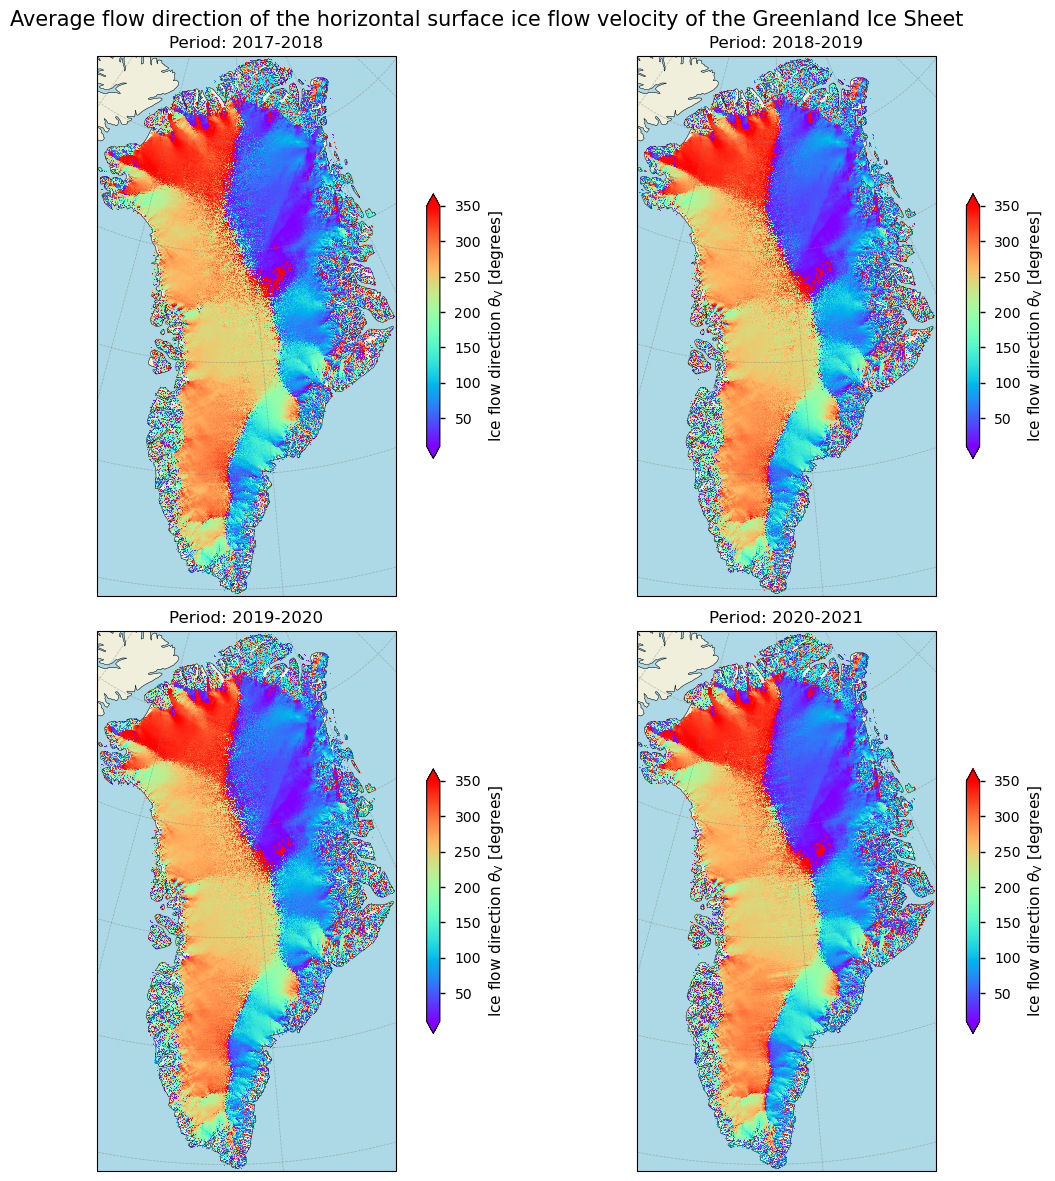

In [47]:
# Apply the function to the ice flow direction data
da = ds["land_ice_flow_direction"]
da.attrs = {
    "long_name": r"Ice flow direction $\theta_{\text{V}}$",
    "units": "degrees",
}
_ = plot_maps(
    da,
    vmin=10,
    vmax=350,
    suptitle="Average flow direction of the horizontal surface ice flow velocity of the Greenland Ice Sheet",
)

The provided image displays maps of ice flow direction for Greenland over all available periods. The color scale indicates the direction of ice flow in degrees, measured clockwise from north (northwards = 0°, eastwards = 90°, southwards = 180°, westwards = 270°). In eastern Greenland, a significant portion of the ice flows towards the east and southeast, with the margins reflecting a more complex flow pattern with varying directions. This can either reflect noise in ice-free areas or the presence of small ice patches/ice caps. Ice over western Greenland predominantly flows towards the west and northwest. Furthermore, several ice divides are visible, of which the most prominent one is situated meriodionally over central Greenland, where flow directions diverge, leading to different drainage basins. All periods show very similar overall patterns. The predominant direction of the ice flow is consistent with the topographical characteristics of the ice sheet (i.e. ice flows perpendicular to the direction of the steepest surface slope). 

Now that we have visualized the spatial patterns of ice flow, we can begin with the analysis. Let us start by investigating the spatio-temporal resolution and extent of the ice sheet surface flow velocities to get an idea of the dataset's maturity.

### ✅ Analysis of spatio-temporal resolution and extent of ice sheet velocities

We begin our analysis by examining the temporal extent of the dataset:

In [84]:
print(f"The temporal extent of the ice sheet velocity dataset is {np.shape(ds['period'])[0]} years.")

The temporal extent of the ice sheet velocity dataset is 4 years.


To determine whether the temporal extent of the ice sheet velocity dataset is sufficient to capture reliable temporal trends in horizontal surface velocities and to use these trends as indicators of climatic changes, we turn to the literature. The Intergovernmental Panel on Climate Change (IPCC) often uses 30 years as a standard period for climate normals and trend analysis to ensure that the analysis captures meaningful climatic changes rather than short-term (intra/interannual) fluctuations. We therefore consider these guidelines to be likewise applicative for ice flow velocities. When measured over a long period (> 30 years), significant trends in surface flow velocities can be considered a clear indicator of a disequilibrium of the ice sheet with the environment, for example due to climate change. Longer periods, as is here the case, provide even more robust trend estimates and reduce the influence of short-term variability. However, the dataset is not of sufficient temporal extent for this purpose.

To have a more extended idea of the temporal and spatial coverage of the gridded dataset, we can plot the total amount of pixels that hold non-NaN velocity data for each year. Let us have this quantified:

In [85]:
# Apply the function to the velocity counts
filtered_data = ds["land_ice_surface_velocity_magnitude"].where(ds["land_ice_surface_velocity_magnitude"] != 0)
non_nan_counts = filtered_data.count(dim=["x", "y"])

non_nan_counts.attrs = {
    "long_name": "Valid measurement counts",
    "units": "counts",
}
# Print values
for i, err in enumerate(non_nan_counts):
    print(f"The total amount of pixels holding non-NaN values " 
          f"for the year {int(i)+int(period_start[:4])}-{int(i)+int(period_start[5:])} CE "
          f"is {int(non_nan_counts.values[i])} counts, which equals a surface area of {1e-12*250*250*int(non_nan_counts.values[i]):.5f} million km².")

The total amount of pixels holding non-NaN values for the year 2017-2018 CE is 34146643 counts, which equals a surface area of 2.13417 million km².
The total amount of pixels holding non-NaN values for the year 2018-2019 CE is 34166241 counts, which equals a surface area of 2.13539 million km².
The total amount of pixels holding non-NaN values for the year 2019-2020 CE is 34181540 counts, which equals a surface area of 2.13635 million km².
The total amount of pixels holding non-NaN values for the year 2020-2021 CE is 34210311 counts, which equals a surface area of 2.13814 million km².


Given that the surface area of the entire continent of Greenland roughly equals 2.165 million km² (of which ca. 80% covered by ice), it is clear that almost the entire continent is covered, including ice-free areas. Let us determine what percentage of the pixels hold a time series of data with a length that is equal to the magnitude of the `time` dimension of the dataset:

In [117]:
filtered_data = ds["land_ice_surface_velocity_magnitude"].where(ds["land_ice_surface_velocity_magnitude"] != 0)
non_nan_counts = filtered_data.count(dim=["period"])
non_nan_counts = non_nan_counts.where(non_nan_counts != 0, np.nan)
equal_to_time = non_nan_counts == np.shape(ds['period'])[0]
larger_than_0 = non_nan_counts > 0
print(f"The number of pixels that have a time series of valid velocity data of {np.shape(ds['period'])[0]} years, which is the total number of years in the dataset, is {equal_to_time.values.sum()} pixels or {(100*(equal_to_time.values.sum())/larger_than_0.values.sum()):.2f}%.")

The number of pixels that have a time series of valid velocity data of 4 years, which is the total number of years in the dataset, is 34126804 pixels or 99.73%.


Let us check where the missing pixels are. In the plot below, pixels with a time series of valid data that are lower than the time dimension of the data are colored red, else they are colored green:

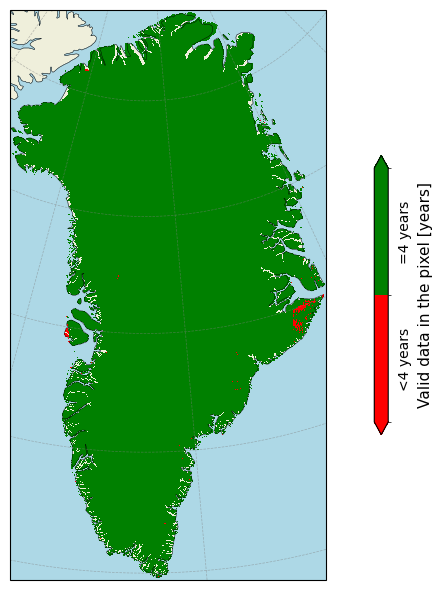

In [128]:
def plot_maps_single(da, suptitle=None, **kwargs):
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    ax.set_title(None)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")
    cb.set_ticks([0.35, 0.85])  # Set the ticks at the midpoints of the ranges
    cb.set_ticklabels([f'<{np.shape(ds["period"])[0]} years', f'={np.shape(ds["period"])[0]} years'])  # Set the tick labels
    cb.ax.yaxis.set_tick_params(rotation=90)
    cb.ax.yaxis.set_tick_params(length=0)

    plt.tight_layout()
    plt.show()

# Apply the function to the velocity standard deviation data
da = equal_to_time.where(~np.isnan(ds["land_ice_surface_velocity_magnitude"].sel(period='2020-2021')))
da.attrs = {
    "long_name": r"Valid data in the pixel",
    "units": "years",
}

# Define bounds and colormap
bounds = [0, 0.5, 1]  # Green (0), Red (1)
cmap = matplotlib.colors.ListedColormap(['red', 'green'])
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

_ = plot_maps_single(
    da,
    cmap=cmap,
    norm=norm,
)

The dataset thus offers GrIS velocity data at regular and consistently spaced temporal intervals (e.g. annual), and there are (almost) no spatial/temporal gaps in the data that could affect a (local or ice sheet-wide) trend analysis. The data are, however, not suited to detect velocity changes at a finer temporal resolution (e.g. short-term monthly or seasonal changes in ice flow velocities). In other words, from the above analysis it becomes clear that the dataset exhibits a consistently complete temporal and spatial coverage, with practically no data gaps, which would allow for reliable quantifications of velocity means, inter and intera-annual variability and trends if the temporal extent would have been sufficient. Moreover, an ice mask is not included and it is thus not possible to exclude non ice-covered pixels from the data. Pixels over ice-free terrain hold non-NaN data and have not been removed, implying that the data exhibits false low velocity measurements and noise over ice-free terrain.

### 📉 Trends of annually averaged horizontal surface ice flow velocities

Although the temporal extent is not sufficient to derive reliable values for the mean, variability and trends (as discussed above), we can still plot a time series of annually averaged ice sheet-wide velocity data to get an idea of their magnitudes and their change over time in the dataset. Let us print the average values over the entire ice sheet for each hydrological year:

In [87]:
da = ds["land_ice_surface_velocity_magnitude"]
da.attrs = {
    "long_name": "Horizontal ice flow velocity V",
    "units": ds[name].attrs["units"],
}
velocity_values = []
# Print values
for i, err in enumerate(da):
    print(f"The annually averaged ice sheet-wide horizontal surface ice flow velocity " 
          f"for the year {int(i)+int(period_start[:4])}-{int(i)+int(period_start[5:])} CE "
          f"is {float(np.abs(np.nanmean(da[i,:]))):.4f} m/day.")
    mean_velocity = np.abs(np.nanmean(da[i,:]))
    velocity_values.append(mean_velocity)

The annually averaged ice sheet-wide horizontal surface ice flow velocity for the year 2017-2018 CE is 0.1172 m/day.
The annually averaged ice sheet-wide horizontal surface ice flow velocity for the year 2018-2019 CE is 0.1164 m/day.
The annually averaged ice sheet-wide horizontal surface ice flow velocity for the year 2019-2020 CE is 0.1154 m/day.
The annually averaged ice sheet-wide horizontal surface ice flow velocity for the year 2020-2021 CE is 0.1131 m/day.


Let us have this trend plotted:

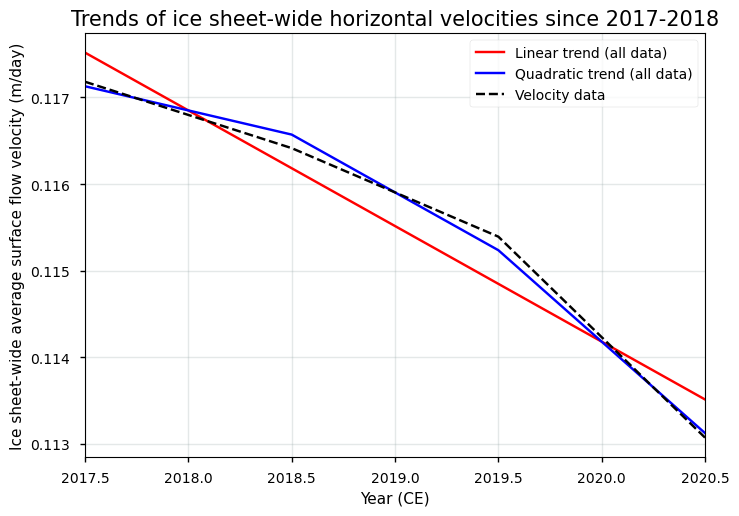

In [88]:
# Extract time and velocity data
periods = [f"{int(period_start[:4]) + i}-{int(period_start[5:]) + i}" for i in range(len(velocity_values))]
# Convert period strings to numerical values (midpoint of each period)
def period_to_year(period):
    start_year, end_year = map(int, period.split('-'))
    return (start_year + end_year) / 2
time = np.array([period_to_year(period) for period in periods])
veloc_data = np.array(velocity_values)
# Calculate linear trend
coeffs = np.polyfit(time, veloc_data, 1)  # 1 indicates a linear fit (degree 1 polynomial)
trend = np.polyval(coeffs, time)  # Evaluate the polynomial at the given time points
coeffs_2 = np.polyfit(time, veloc_data, 2)  # 2 indicates a quadratic fit (degree 2 polynomial)
trend_2 = np.polyval(coeffs_2, time)  # Evaluate the polynomial at the given time points
# Plot the data
fig, ax = plt.subplots()
ax.plot(time,trend,'r',label='Linear trend (all data)')
ax.plot(time,trend_2,'b',label='Quadratic trend (all data)')
ax.plot(time,veloc_data,'k--',label='Velocity data')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(time),np.max(time))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Ice sheet-wide average surface flow velocity (m/day)")
ax.legend()
ax.set_title("Trends of ice sheet-wide horizontal velocities since "+ period_start.replace("_","-"),fontsize=15);plt.show()

We can quantify the linear trend as follows:

In [89]:
# coeffs[0] is the slope, coeffs[1] is the intercept
print(f"The linear trend of the ice sheet-wide horizontal surface ice flow velocity between {period_start.replace('_', '-')} and {period_stop.replace('_', '-')} is {coeffs[0]:.4f} m day⁻¹ yr⁻¹.")

The linear trend of the ice sheet-wide horizontal surface ice flow velocity between 2017-2018 and 2020-2021 is -0.0013 m day⁻¹ yr⁻¹.


The provided plot shows the trends of ice sheet-wide horizontal surface ice flow velocities since the period 2017-2018. Both the linear and quadratic trends show a decrease in the ice sheet-wide horizontal surface ice flow velocity from 2017-2018 to 2020-2021. This means that the ice flow is slowing down over this period. The actual velocity data (black dashed line) closely follows the quadratic trend, suggesting that the actual changes in ice flow velocity are better represented by a quadratic model rather than a simple linear model. These negative trends (a slowing down of the ice) agree with what can be expected from a warming climate: as the ice gets thinner, it will flow slower. 

However, it must be said that the temporal extent of the velocity data is relatively short. Longer-term observations (> 30 years) are necessary to identify persistent trends and separate short-term variability from long-term changes. Moreover, the sign and magnitude of the trend in ice sheet-wide velocity data for Greenland are highly influenced by the inclusion of velocity estimates over ice-free terrain. Therefore, the value of the trend is also dependent upon a chosen threshold velocity used to differentiate between flowing ice-covered pixels and stable, ice-free ground. If the threshold is too low, stable ground may be included, skewing the trend toward lower velocities. Conversely, if the threshold is too high, slower-moving ice may be excluded, resulting in an overestimation of average velocities. Therefore, further investigation and long-term monitoring of velocities over ice-covered areas are essential to accurately and reliably assess and interpret trends of ice flow velocities and their implications for future ice sheet behavior and sea-level rise.

### 📌 Implications for deriving multi-year trends and the intra/interannual variability of surface flow velocities and associated patterns of solid ice discharge

Reliable and long-term trends in ice sheet flow velocities are essential for understanding the complex dynamics of ice sheets, predicting future sea-level rise, assessing ice sheet stability, improving climate models, evaluating climate change impacts, guiding mitigation and adaptation strategies, and detecting feedback mechanisms. These insights are critical for scientific research, policymaking, and global efforts to address and adapt to climate change. One of such processes for which ice flow velocities are important is the quantification of solid ice discharge.

Solid ice discharge is the transport of solid ice across the grounding line of an ice sheet. This process represents the loss of grounded ice from the ice sheet to the ocean due to ice flow. The grounding line is the boundary between the grounded ice sheet, where ice rests on bedrock, and the floating ice, which is buoyant. As ice flows from the grounded portion of the ice sheet into the ocean, it contributes to sea-level rise. Solid ice discharge $D$ therefore is a critical component of the total mass balance of an ice sheet $M$:

$M = SMB - D$

where:
- $M$ is the total mass balance or the total ice mass loss or gain [Gt yr$^{-1}$],
- $SMB$ is surface mass balance (often also supplemented by the basal and internal mass balance) [Gt yr$^{-1}$],
- $D$ is the solid ice discharge (zero for land-terminating glaciers/ice sheets) [Gt yr$^{-1}$].

The solid discharge $D$ can be further expressed as a mass flux as follows:

$D = \rho_i \cdot \overline{V} \cdot A = \rho_i \cdot \overline{V} \cdot H \cdot w
$

where
- $\rho_i$ is the ice density [kg m$^{-3}$],
- $\overline{V}$ the vertically averaged horizontal ice flow velocity at the grounding line [m yr$^{-1}$],
- $H$ the ice thickness at the grounding line [m],
- $A$ the considered cross-sectional area [m],
- $w$ the width of the cross section across the groundling line [m].

Ice flow velocities are thus an important component to assess the solid ice discharge and its trends over time. The dataset provided for monitoring Greenland ice sheet surface  flow velocity patterns on the CDS is a relatively mature dataset that can serve as input for solid ice discharge calculations, as it has a suitable spatial resolution (250 m) for capturing detailed flow patterns, particularly near ice margins and outlet glaciers. The spatial coverage is furthermore comprehensive, encompassing the entire ice sheet, including peripheral glaciers and ice caps, with almost no gaps present. The dataset's completeness thus appears high, with minimal missing values. 

However, the temporal coverage only extends from 2017-2018 onwards, which is too short to perform a reliable long-term trend analysis. The dataset's short temporal extent therefore pose a limitation to deduce reliable long-term trends of horizontal surface flow velocities and solid ice discharge. Hence, for comprehensive glaciological studies and solid ice discharge modeling, supplementary datasets with a longer temporal extent (preferably > 30 years) should be considered to capture the changing patterns of ice flow dynamics. Furthermore, to precisely quantify the solid ice discharge, also other additional and external datasets of other variables are needed, of which the most important ones are the position of the grounding line and the ice thickness at those locations (e.g. Mankoff et al., 2020). The lack of information related to the time of the year of the valid data acquisitions, as well as a missing ice mask that can be used to distinguish between ice-covered and non ice-covered grid cells near the margins, further complicate the use of the data. Moreover, the dataset provides horizontal surface velocities, while solid ice discharge calculations require vertically averaged horizontal velocities. However, because basal sliding is generally the dominant process that defines the ice velocity at the grounding line, velocities generally do not vary significantly with depth at these locations (e.g. Mankoff et al., 2020). The dataset's annually averaged temporal resolution is furthermore sufficient for solid ice discharge calculations, as seasonal variations in $D$ are generally not significant when compared to the tamporal variability of the $SMB$ (e.g. van den Broeke et al., 2009).

Users should acknowledge that typical problem areas for SAR-derived velocity estimates include the ice sheet margins (where solid ice discharge occurs) and interior low-velocity zones. In these regions, there are generally lower valid measurement counts and/or higher standard deviation values, indicating lower data quality. The data quality around the ice sheet margins is affected by complex terrain, fast-flowing glaciers and rapidly changing surface conditions, such as the seasonal cycle of melt and accumulation, which complicate the data acquisition and increase the standard deviation. In contrast, the interior zones, which are however unimportant for solid ice discharge calculations, often lack distinct surface features/patterns which are crucial for offset tracking and hence likewise hinders efficient data retrieval. These low-flow zones also experience ‘striping’, which are artefacts that can bias the data.

In other words, the GrIS velocity dataset is generally well-suited to be used in the context of solid ice discharge quantifications in terms of its spatial/temporal resolution, spatial coverage and data completeness. However, the GrIS velocity data are at this stage found to be less suitable to derive the corresponding long-term mean values, variability and trends (climate change signals), as the number of consecutive years is too small to filter out variability and derive reliable conclusions. The derivation of surface ice flow velocity trends, as well as the associated patterns of solid ice discharge should therefore be handled with care. Integrating additional external datasets with longer time spans can therefore increase the robustness of the data. 

## ℹ️ If you want to know more

### Key resources

- "Greenland ice sheet annual gridded velocity data from 2017 to present derived from satellite observations" on the CDS
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111.

- Howat, I., Chudley, T., and Noh, M. (2022). MEaSUREs Greenland Ice Velocity: Selected Glacier Site Single-Pair Velocity Maps from Optical Images, Version 1. [Dataset]. https://doi.org/10.5067/b28fm2qvvywy.

- Lüttig, C., Neckel, N., and Humbert, A. (2017). A Combined Approach for Filtering Ice Surface Velocity Fields Derived from Remote Sensing Methods, Remote Sensing, 9(10). https://doi.org/10.3390/rs9101062.

- Mankoff, K.D., Solgaard, A., Colgan, W., Ahlstrøm, A.P., Khan, S.A., and Fausto, R.S. (2020). Greenland Ice Sheet solid ice discharge from 1986 through March 2020, Earth System Science Data, 12, 1367–1383. https://doi.org/10.5194/essd-12-1367-2020.

- Nagler, T., Rott, H., Hetzenecker, M., Wuite, J. and Potin, P. (2015). The Sentinel-1 Mission: New Opportunities for Ice Sheet Observations. Remote Sensing. 7(7):9371-9389. https://doi.org/10.3390/rs70709371.

- Paul, F., Bolch, T., Briggs, K., Kääb, A., McMillan, M., McNabb, R., Nagler, T., Nuth, C., Rastner, P., Strozzi, T., and Wuite, J. (2017). Error sources and guidelines for quality assessment of glacier area, elevation change, and velocity products derived from satellite data in the Glaciers_cci project, Remote Sensing of Environment, 203, 256-275. https://doi.org/10.1016/j.rse.2017.08.038.

- van den Broeke, M., Bamber, J., Ettema, J., Rignot, E., Schrama, E., van de Berg, W. J., van Meijgaard, E., Velicogna, I., and Wouters, B. (2009). Partitioning recent Greenland mass loss. Science, 326(5955), 984-986. https://doi.org/10.1126/science.1178176.